## Dividir el dataset en conjunto de entrenamiento y testing

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/joanby/python-ml-course/master/datasets/ads/Advertising.csv")
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
a= np.random.randn(len(data))

(array([ 2.,  6., 13., 33., 50., 43., 25., 16.,  8.,  4.]),
 array([-2.70298618, -2.17193962, -1.64089306, -1.10984649, -0.57879993,
        -0.04775337,  0.4832932 ,  1.01433976,  1.54538632,  2.07643289,
         2.60747945]),
 <BarContainer object of 10 artists>)

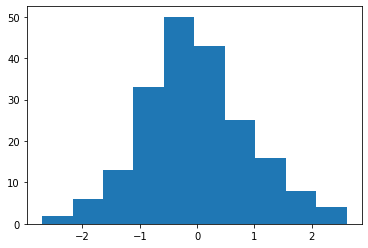

In [6]:
plt.hist(a)


#### 80% para entrenar y 20% para validar

In [8]:
check = (a<0.8)
training = data[check]
testing = data[~check]

In [9]:
len(training), len(testing)

(160, 40)

In [10]:
import statsmodels.formula.api as smf
lm = smf.ols(formula="Sales~TV+Radio", data=training).fit()
lm.summary()

#R-squared = 0.913 M
#F-statistic 825.1 Muy alto
#P valor (F-statistic): bajisimo e-84
# coef son buenos. (bajitos.)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     825.1
Date:                Wed, 02 Mar 2022   Prob (F-statistic):           5.05e-84
Time:                        17:44:17   Log-Likelihood:                -295.51
No. Observations:                 160   AIC:                             597.0
Df Residuals:                     157   BIC:                             606.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0168      0.302     10.000      0.000       2.421       3.613
TV             0.0456      0.001     31.095      0.000       0.043       0.049
Radio          0.1886      0.008     23.246      0.000       0.173       0.205
==============================================================================
Omnibus:                       22.013   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.362
Skew:                          -0.934   Prob(JB):                     1.89e-06
Kurtosis:                       3.681   Cond. No.                         419.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Sales = 3.0168 + 0.0456 * TV + 0.1886 * Radio

# Validacion del modelo con el conjunto de testing

In [11]:
sales_pred = lm.predict(testing)
sales_pred

9      12.627803
10      7.128299
16     13.016008
19     14.249306
23     16.626323
24      8.237587
31     11.452852
33     18.913781
35     17.060175
39     20.536337
44      9.010660
47     21.796381
51      9.410860
52     20.761379
54     20.441432
67     12.110907
71     10.726560
81     14.736687
101    23.394572
108     3.690295
110    14.871036
113    16.470671
125     9.223313
127     6.677826
128    22.316477
130    10.518940
132     8.531296
134    11.982761
138     9.865489
146    15.354028
160    14.305527
162    15.031332
166    10.926807
168    17.301350
169    17.994186
171    14.468534
172     7.703212
184    18.620365
190    12.573046
197    12.850913
dtype: float64

In [13]:
SSD = sum((testing["Sales"]-sales_pred)**2)
SSD

182.1701373360319

In [14]:
RSE = np.sqrt(SSD/(len(testing)-2-1))
RSE

2.2189000034472395

In [16]:
#Proporcion respecto al promedio de ventas
sales_mean = np.mean(testing["Sales"])
error = RSE/sales_mean
error

0.16605425657229106